<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [78]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie plotly express 
import plotly.express as px 

#Importation de la librairie Numpy
import numpy as np

#importation de seaborn
import seaborn as sns

#importation de matplotlib
import matplotlib.pyplot as plt

#Importation de scipy
import scipy.stats as stats

In [79]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

#création d'un dataframe exemple.
exemple= pd.DataFrame ({'col1' : ['a','b','xcd'],
                        'col2' : [12,1835,1],
                        'col3' : [1,1,'aaa']})

print("la liste des noms des colonnes du dataframe df_ex : ", exemple.columns.values)

la liste des noms des colonnes du dataframe df_ex :  ['col1' 'col2' 'col3']


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [80]:
#les fichiers excel on été convertis en csv au préalable.
#Importation du fichier web.csv
df_web = pd.read_csv("web.csv", delimiter=';') # préciser que le délimiteur est ; et non pas , car la virgule est utilisée pour les chiffres en france plutot qu'un point.
#Importation du fichier erp.csv
df_erp = pd.read_csv("erp.csv", delimiter=';') #erp = entrerise ressources planning.
#importation du fichier liaison.csv
df_liaison = pd.read_csv("liaison.csv", delimiter=';')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [81]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [82]:
#Consulter le nombre de colonnes
print("Le tableau df_erp comporte {} colonne(s)".format(df_erp.shape[1]))
print("--------------------------------------------------")
#La nature des données dans chacune des colonnes
print("La nature des colonnes sont : ", df_erp.dtypes)
print("--------------------------------------------------")
#Le nombre de valeurs présentes dans chacune des colonnes
for colonne in df_erp.columns :
    values_sum = df_erp[colonne].count()
    print(f"Somme des valeurs dans la colonne '{colonne}' : {values_sum}")


Le tableau df_erp comporte 6 colonne(s)
--------------------------------------------------
La nature des colonnes sont :  product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
purchase_price    object
dtype: object
--------------------------------------------------
Somme des valeurs dans la colonne 'product_id' : 825
Somme des valeurs dans la colonne 'onsale_web' : 825
Somme des valeurs dans la colonne 'price' : 825
Somme des valeurs dans la colonne 'stock_quantity' : 825
Somme des valeurs dans la colonne 'stock_status' : 825
Somme des valeurs dans la colonne 'purchase_price' : 825


In [83]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
duplicatas = df_erp[df_erp.duplicated]

print("Ci-dessous le nombre de valeurs ayant des duplicatas par colonnes : ","\n\n",duplicatas.count())

Ci-dessous le nombre de valeurs ayant des duplicatas par colonnes :  

 product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64


In [84]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("Valeurs distinctes de la colonne stock_status : ",df_erp.stock_status.unique())

valeurs = df_erp.loc[df_erp['stock_status'] == 'outofstock', 'stock_quantity']
print("\n\nLa colonne stock_status semble être en lien avec la colonne",valeurs.value_counts(),"\n\nBien que certaines valeurs semblent étrange ou érronnées.")




Valeurs distinctes de la colonne stock_status :  ['instock' 'outofstock']


La colonne stock_status semble être en lien avec la colonne stock_quantity
 0     89
 3      1
-10     1
-1      1
Name: count, dtype: int64 

Bien que certaines valeurs semblent étrange ou érronnées.


In [85]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x != 0 else 'outofstock')#la fonction lambda est affecté à une variable.
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
0,3847,1,"24,2",16,instock,"12,88",instock
1,3849,1,"34,3",10,instock,"17,54",instock
2,3850,1,"20,8",0,outofstock,"10,64",outofstock
3,4032,1,"14,1",26,instock,"6,92",instock
4,4039,1,46,3,outofstock,"23,77",instock


In [86]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter


df_erp['stock_status'] == df_erp['stock_status2']


0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [87]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset


comp=df_erp['stock_status'] == df_erp['stock_status2']
somme = comp.astype(int).sum()

print("La somme des valeurs booléennes converties est :",  somme , "\nNombre de valeurs différentes :", 825 - somme )


La somme des valeurs booléennes converties est : 821 
Nombre de valeurs différentes : 4


In [88]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
print('visualisation des lignes différentes entre stock_status et stock_status2 : ')
df_erp[(df_erp.stock_status)!=(df_erp.stock_status2)]

visualisation des lignes différentes entre stock_status et stock_status2 : 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2
4,4039,1,46,3,outofstock,"23,77",instock
398,4885,1,"18,7",0,instock,"9,66",outofstock
449,4973,0,10,-10,outofstock,"4,96",instock
573,5700,1,"44,5",-1,outofstock,"22,3",instock


In [89]:
#Corriger la ou les données incohérentes
df_erp['stock_quantity'] = df_erp['stock_quantity'].clip(lower=0) #clip est une fonction qui permet de modifier les valeurs d'un df en établissant des barrières.
df_erp.loc[4,"stock_status"]="instock"
df_erp.loc[398,"stock_status"]="outofstock"
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp['stock_status2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x != 0 else 'outofstock')

df_erp[(df_erp.stock_status)!=(df_erp.stock_status2)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status2


In [90]:
df_erp.drop(columns=["stock_status2"],inplace=True)
print('On supprime stock_status2')
df_erp.head()

On supprime stock_status2


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,"24,2",16,instock,"12,88"
1,3849,1,"34,3",10,instock,"17,54"
2,3850,1,"20,8",0,outofstock,"10,64"
3,4032,1,"14,1",26,instock,"6,92"
4,4039,1,46,3,instock,"23,77"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [91]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

df_erp["price"] = df_erp["price"].str.replace(",", ".") #changer le séparateur pour pouvoir convertir en numeric
df_erp["price"] = pd.to_numeric(df_erp["price"]) #convertir en numeric

print("nombre de lignes ayant des données nulles : ",df_erp['price'].isnull().sum()) #voir si il y a des NULL
print('\n-------------------------------------')
print('\nlignes présentant des valeurs négative : ')
lignes_negative=df_erp[df_erp['price']<0]
lignes_negative




nombre de lignes ayant des données nulles :  0

-------------------------------------

lignes présentant des valeurs négative : 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
151,4233,0,-20.0,0,outofstock,"10,33"
469,5017,0,-8.0,0,outofstock,"4,34"
739,6594,0,-9.1,19,instock,"4,61"


In [92]:
#Afficher le ou les prix non renseignés dans la colonne "price"
valeurs_null=df_erp['price'].isnull().sum()
print("\nNombres d'article avec un prix non renseigné: {}".format(valeurs_null)) #Saisir l'instruction manquante dans la fonction format
print('\n-------------------------------------')
#Afficher le prix minimum de la colonne "price"
print('\nPrix minimum de la colonne : ',df_erp['price'].min())
print('\n-------------------------------------')
#Afficher le prix maximum de la colonne "price"
print('\nPrix maximum de la colonne : ',df_erp['price'].max())
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('\n-------------------------------------')
lignes_negative=df_erp[df_erp['price']<0]
print('\nlignes présentant des valeurs négative : ','\n',lignes_negative['price'])
print('\nles valeurs négatives sont sans doutes une erreur de saisie.')

#df_erp.loc[151,"price"]=20.0
#df_erp.loc[469,"price"]=8.0
#df_erp.loc[739,"price"]=9.1
#print("\nlignes négatives converties en positif :","\n",df_erp.loc[[151, 469, 739],'price'])



Nombres d'article avec un prix non renseigné: 0

-------------------------------------

Prix minimum de la colonne :  -20.0

-------------------------------------

Prix maximum de la colonne :  225.0

-------------------------------------

lignes présentant des valeurs négative :  
 151   -20.0
469    -8.0
739    -9.1
Name: price, dtype: float64

les valeurs négatives sont sans doutes une erreur de saisie.


In [93]:
negative=df_erp[df_erp['price']<0]
negative

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
151,4233,0,-20.0,0,outofstock,"10,33"
469,5017,0,-8.0,0,outofstock,"4,34"
739,6594,0,-9.1,19,instock,"4,61"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [94]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
lignes_negative=df_erp[df_erp['price']<0]
print('type de la colonne stock quantity: ',df_erp['stock_quantity'].dtype,
      "\nnombre de lignes nulles : ", df_erp['stock_quantity'].isnull().sum(),
      "\nnombre de valeurs négative : ",lignes_negative['stock_quantity'].sum())
#Afficher la quantité minimum de la colonne "stock_quantity"
print('quantité minimum : ',df_erp['stock_quantity'].min())
#Afficher la quantité maximum de la colonne "stock_quantity"
print('quantité maximum : ',df_erp['stock_quantity'].max())
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('----------------------------------------------------')
print('les valeurs inférieur à 0 on déjà été corrigé précédement et on été tranformé en 0.')


type de la colonne stock quantity:  int64 
nombre de lignes nulles :  0 
nombre de valeurs négative :  19
quantité minimum :  0
quantité maximum :  145
----------------------------------------------------
les valeurs inférieur à 0 on déjà été corrigé précédement et on été tranformé en 0.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [95]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print('La colonne onsale_web contient des valeurs de type : ',df_erp['onsale_web'].dtype)
print('liste des valeurs unique : ',df_erp['onsale_web'].unique() )
print('Nombre de valeurs manquantes : ',df_erp['onsale_web'].isnull().sum())
print("\nOn peu en conclure qu'en fait la colonne onsale_web est in booléen déterminant si un produit est en vente sur le site ou non.")
print('1 représentant les produits en vente sur le site et 0 les produit seulement disponible sur place.')
print('\n----------------------------------------------------')
print('\nune bonne idée serais de vérifier si toutes les lignes contenant un 0 sont aussi considéré out of stock dans la colonne stock_status.')

print('\nnombre de lignes ayant pour valeur 0 dans onsale_web : ',len(df_erp[df_erp['onsale_web']==0]))
nb_lines_out = len(df_erp[(df_erp['onsale_web'] == 0) & (df_erp['stock_status'] == 'outofstock')])
nb_lines_on = len(df_erp[(df_erp['onsale_web'] == 0) & (df_erp['stock_status'] == 'instock')])
print('\nnombre de lignes ou onsale_web = 0 et stock_status = outofstock : ',nb_lines_out)
print('nombre de lignes ou onsale_web = 0 et stock_status = instock : ',nb_lines_on)

La colonne onsale_web contient des valeurs de type :  int64
liste des valeurs unique :  [1 0]
Nombre de valeurs manquantes :  0

On peu en conclure qu'en fait la colonne onsale_web est in booléen déterminant si un produit est en vente sur le site ou non.
1 représentant les produits en vente sur le site et 0 les produit seulement disponible sur place.

----------------------------------------------------

une bonne idée serais de vérifier si toutes les lignes contenant un 0 sont aussi considéré out of stock dans la colonne stock_status.

nombre de lignes ayant pour valeur 0 dans onsale_web :  109

nombre de lignes ou onsale_web = 0 et stock_status = outofstock :  44
nombre de lignes ou onsale_web = 0 et stock_status = instock :  65


In [96]:
#Quelles sont les colonnes à conserver selon vous?
print('product_id : sert à identifier le produit et à faire la liaison avec les autres tables.')
print('onsale_web : sert à déterminer si le produit est en vente en ligne. pourrais être transformé en booléen true/false.')
print('price : prix de vente')
print('stock_quantity : nombre de produits en stock')
print('stock_status : booléen déterminant si le produit est en stock.')
print("purchase_price : prix d'achat.")
print("\nLa colonne pouvant être supprimée est stock_status puisque nous avons déjà stock_quantity qui détermine si un produit est disponible à la vente ou non.")

product_id : sert à identifier le produit et à faire la liaison avec les autres tables.
onsale_web : sert à déterminer si le produit est en vente en ligne. pourrais être transformé en booléen true/false.
price : prix de vente
stock_quantity : nombre de produits en stock
stock_status : booléen déterminant si le produit est en stock.
purchase_price : prix d'achat.

La colonne pouvant être supprimée est stock_status puisque nous avons déjà stock_quantity qui détermine si un produit est disponible à la vente ou non.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [97]:
######################
##   prix d'achat   ##
######################

df_erp["purchase_price"] = df_erp["purchase_price"].str.replace(",", ".") #changer le séparateur pour pouvoir convertir en numeric
df_erp["purchase_price"] = pd.to_numeric(df_erp["purchase_price"]) #convertir en numeric

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
lignes_negative=df_erp[df_erp['purchase_price']<0]
print('type de la colonne purchase_price: ',df_erp['purchase_price'].dtype,
      "\nnombre de lignes nulles : ", df_erp['purchase_price'].isnull().sum(),
      "\nnombre de valeurs négative : ",lignes_negative['purchase_price'].sum())

#Afficher le prix minimum de la colonne "purchase_price"
print('prix minimum : ',df_erp['purchase_price'].min())
#Afficher le prix maximum de la colonne "purchase_price"
print('prix maximum : ',df_erp['purchase_price'].max())

type de la colonne purchase_price:  float64 
nombre de lignes nulles :  0 
nombre de valeurs négative :  0.0
prix minimum :  2.74
prix maximum :  137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [98]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))



Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [99]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 29 colonne(s)


In [100]:
#La nature des données dans chacune des colonnes
print("nature des données dans chaque colonne : ","\n",df_web.dtypes)

nature des données dans chaque colonne :  
 sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
product_type              object
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64

In [101]:
#Le nombre de valeurs présentes dans chacune des colonnes
print('nombre de valeurs par colonnes :')
df_web.count()

nombre de valeurs par colonnes :


sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [102]:
#Selon vous, quelles sont les colonnes à conserver ?
print("- SKU :  Stock Keeping Unit numéro unique utilisé pour le suivi interne des stocks d'une entrepris")
print("- Total_sales : total des ventes")
print("- post_date : année ou le produit à été posté. le Greenwich Mean Time n'est sans doutes pas nécéssaire.")
print("- product_type : le type du produit.")
print("- post_title : le nom du produit.")
print("- post_type : définit si le lien est le produit ou l'image du produit.\nSera supprimé par la suite mais est nécéssaire pour identifier des doublons pour l'instant.")

- SKU :  Stock Keeping Unit numéro unique utilisé pour le suivi interne des stocks d'une entrepris
- Total_sales : total des ventes
- post_date : année ou le produit à été posté. le Greenwich Mean Time n'est sans doutes pas nécéssaire.
- product_type : le type du produit.
- post_title : le nom du produit.
- post_type : définit si le lien est le produit ou l'image du produit.
Sera supprimé par la suite mais est nécéssaire pour identifier des doublons pour l'instant.


In [103]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
list_col=["sku","total_sales","post_date","product_type","post_title","post_type"]
df_web=(df_web[list_col])
df_web.head()

,sku,total_sales,post_date,product_type,post_title,post_type
0,11862,3.0,2018-02-12 13:46:23,Vin,Gilles Robin Hermitage Rouge 2012,attachment
1,16057,5.0,2018-04-17 15:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,attachment
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product
3,16295,14.0,2018-02-15 14:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,attachment
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,product


In [104]:
#Visualisation des valeurs de la colonne sku
list_sku=df_web['sku'].tolist()
print('liste des valeurs de la colonne sku : ',list_sku[:10],'et caetera.')
print()
print('\nle type de la colonne sku est : ',df_web['sku'].dtypes)
print('il y a {} éléments nulles dans sku.'.format(df_web['sku'].isnull().sum()))


str_len = df_web['sku'].str.len()

min_val = (str_len == str_len.min())
sku_minimum=df_web['sku'][min_val]

max_val = (str_len == str_len.max())
sku_maximum=df_web['sku'][max_val]
print('\nvaleurs les plus courte : ',"\n", sku_minimum)
print('\nvaleurs les plus longues : ',"\n", sku_maximum)



#Quelles sont les valeurs qui ne semblent pas respecter la règle de codification?


liste des valeurs de la colonne sku :  ['11862', '16057', '14692', '16295', '15328', '15471', '16515', '16246', nan, '13572'] et caetera.


le type de la colonne sku est :  object
il y a 85 éléments nulles dans sku.

valeurs les plus courte :  
 458     38
964     38
965     41
1127    41
Name: sku, dtype: object

valeurs les plus longues :  
 842     bon-cadeau-25-euros
1387    bon-cadeau-25-euros
Name: sku, dtype: object


In [105]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
sku_weird = df_web[df_web['sku'].str.contains('[!@#$%&*()_+=|<>?{}\\[\\]~-]' or '[a-zA-Z]', na=False,regex=True)]
sku_weird


,sku,total_sales,post_date,product_type,post_title,post_type
272,13127-1,4.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product
842,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,attachment
1117,13127-1,4.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment
1387,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,product


In [106]:
#Identifier les lignes sans code articles
df_null=df_web[df_web['sku'].isnull()]
df_null

,sku,total_sales,post_date,product_type,post_title,post_type
8,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_null=df_web[df_web['sku'].isnull()]
print("Première version comporte beaucoup de lignes complètement vide.")
df_null.info()


Première version comporte beaucoup de lignes complètement vide.
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   post_date     2 non-null      object 
 3   product_type  2 non-null      object 
 4   post_title    2 non-null      object 
 5   post_type     2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 4.6+ KB


In [108]:
df_web.dropna(how='all', inplace=True) #permet de suprimmer les lignes n'ayant que des valeurs nulles
print('après correction.')
df_nullnew=df_web[df_web['sku'].isnull()]
df_nullnew.info()

après correction.
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1084 to 1087
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   post_date     2 non-null      object 
 3   product_type  2 non-null      object 
 4   post_title    2 non-null      object 
 5   post_type     2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 112.0+ bytes


In [109]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
no_null = df_web[~df_web['sku'].isnull()]
duplicatas=no_null[no_null['sku'].duplicated(keep=False)]
duplicatas=duplicatas.sort_values(by=["sku"])
print("les duplicatas sembles être du à la colonne post_type. chaque produit à deux lignes. \nUne avec les info produit, et une autre similaire mais avec un lien de l'image du produit")
duplicatas.head()


les duplicatas sembles être du à la colonne post_type. chaque produit à deux lignes. 
Une avec les info produit, et une autre similaire mais avec un lien de l'image du produit


,sku,total_sales,post_date,product_type,post_title,post_type
668,10014,10.0,2019-04-04 15:45:23,Gin,Darnley's London Dry Gin Original,product
1030,10014,10.0,2019-04-04 15:45:23,Gin,Darnley's London Dry Gin Original,attachment
887,10459,4.0,2018-04-13 15:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,attachment
748,10459,4.0,2018-04-13 15:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,product
802,10775,6.0,2018-04-17 21:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,product


In [110]:

indexNames = df_web[df_web["post_type"] == "attachment"].index
df_web.drop(indexNames, inplace=True)
print('suppression des boublons.')
df_web.head()

suppression des boublons.


,sku,total_sales,post_date,product_type,post_title,post_type
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,product
6,16515,10.0,2018-06-02 09:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,product
11,16585,15.0,2018-02-16 14:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019,product
14,12869,7.0,2019-03-28 14:29:35,Vin,Stéphane Tissot Arbois D.D. 2016,product


In [111]:
print('On peut ensuite supprimer la colonne post_type.')
df_web.drop(columns=["post_type"],inplace=True)
df_web.head()

On peut ensuite supprimer la colonne post_type.


,sku,total_sales,post_date,product_type,post_title
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017
6,16515,10.0,2018-06-02 09:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018
11,16585,15.0,2018-02-16 14:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019
14,12869,7.0,2019-03-28 14:29:35,Vin,Stéphane Tissot Arbois D.D. 2016


In [112]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_null=df_web[df_web['sku'].isnull()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_null.info()
#3 - Que constatez-vous?
print('\nA part la colonne sku toutes les autres colonnes contiennent 2 éléments non nulle.')

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1084 to 1087
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   post_date     2 non-null      object 
 3   product_type  2 non-null      object 
 4   post_title    2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 96.0+ bytes

A part la colonne sku toutes les autres colonnes contiennent 2 éléments non nulle.


In [113]:
df_web_numeric = df_web.select_dtypes(include=['float64', 'int64'])

compte_negatif = (df_web_numeric < 0).sum()
print('nombre de lignes contenant un nombre négatif :')
print(compte_negatif)

total_sales_negative=df_web[df_web['total_sales']<0]
print('\nvisualisation des lignes négatives : \n',total_sales_negative)

print("\nNous constatons que ce sont les deux lignes sans codes articles restant car ayant des informations dans les autres colonnes.")

nombre de lignes contenant un nombre négatif :
total_sales    2
dtype: int64

visualisation des lignes négatives : 
       sku  total_sales            post_date product_type  \
1084  NaN        -56.0  2018-08-08 11:23:43          Vin   
1087  NaN        -17.0  2018-07-31 12:07:23          Vin   

                                           post_title  
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018  
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017  

Nous constatons que ce sont les deux lignes sans codes articles restant car ayant des informations dans les autres colonnes.


In [114]:
df_web.info()
print("\nJe supprime les deux lignes nulles et la ligne bon cadeau. pour l'instant")
df_web = df_web.drop(index=[1084, 1087,1387])
df_web.info()
df_web


<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1509
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           714 non-null    object 
 1   total_sales   716 non-null    float64
 2   post_date     716 non-null    object 
 3   product_type  715 non-null    object 
 4   post_title    716 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.6+ KB

Je supprime les deux lignes nulles et la ligne bon cadeau. pour l'instant
<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 2 to 1509
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           713 non-null    object 
 1   total_sales   713 non-null    float64
 2   post_date     713 non-null    object 
 3   product_type  713 non-null    object 
 4   post_title    713 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.4+ KB


,sku,total_sales,post_date,product_type,post_title
2,14692,5.0,2019-03-19 10:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016
4,15328,2.0,2019-03-27 18:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017
6,16515,10.0,2018-06-02 09:31:31,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018
11,16585,15.0,2018-02-16 14:03:16,Vin,Xavier Frissant Touraine Sauvignon 2019
14,12869,7.0,2019-03-28 14:29:35,Vin,Stéphane Tissot Arbois D.D. 2016
...,...,...,...,...,...
1503,13074,4.0,2018-02-12 14:25:28,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...
1505,16322,0.0,2018-02-15 13:51:32,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
1507,12365,10.0,2019-01-29 15:53:05,Vin,Parés Baltà Penedès Electio 2013
1508,16326,5.0,2019-04-18 11:32:46,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [115]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("df_liaison comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]),"et {} colonnes.".format(df_liaison.shape[1]))
print("Nombre total d'éléments : ",df_liaison.size)



df_liaison comporte 825 observation(s) ou article(s) et 2 colonnes.
Nombre total d'éléments :  1650


In [116]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
#La nature des données dans chacune des colonnes
print('\nnature par colonne : ','\n',df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print('\nIl y a {} valeurs dans id_web'.format(df_liaison['id_web'].count()))
print('Il y a {} valeurs dans product_id'.format(df_liaison['product_id'].count()))

Le tableau comporte 2 colonne(s)

nature par colonne :  
 id_web        object
product_id     int64
dtype: object

Il y a 734 valeurs dans id_web
Il y a 825 valeurs dans product_id


In [117]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?

duplicatas=df_liaison[df_liaison['product_id'].duplicated(keep=False)]
duplicatas=duplicatas.sort_values(by=["product_id"])

print(duplicatas.head())


Empty DataFrame
Columns: [id_web, product_id]
Index: []


In [118]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
no_null = df_liaison[~df_liaison['id_web'].isnull()]
duplicatas=no_null[no_null['id_web'].duplicated(keep=False)]
duplicatas=duplicatas.sort_values(by=["id_web"])

print(duplicatas.head())
print("Si l'on ignore les valeurs nulles, il n'y a pas de doublons.")

Empty DataFrame
Columns: [id_web, product_id]
Index: []
Si l'on ignore les valeurs nulles, il n'y a pas de doublons.


In [119]:
#Avons-nous des articles sans correspondances?
print('Compte des elements nulles dans df_liaison : ','\n',df_liaison.isnull().sum())
nulle=df_liaison[df_liaison.isnull().any(axis=1)]

nulle.head()

Compte des elements nulles dans df_liaison :  
 id_web        91
product_id     0
dtype: int64


,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209


In [120]:
#df_liaison = df_liaison.dropna(how='any',axis=0)

#print('retirons les lignes ayant des valeurs nulles')
#nulle=df_liaison[df_liaison.isnull().any(axis=1)]
#nulle.head()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [121]:
#Fusion des fichiers df_erp et df_liaison
df_erp_x_liaison = pd.merge(df_erp, df_liaison, on='product_id', how='outer')
df_erp_x_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,instock,23.77,19815


In [122]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print('Il y a {} lignes dans df_erp_x_liaison.'.format(df_erp_x_liaison['id_web'].shape[0]))
print('Cependant il y a {} lignes nulles dans la colonne id_web'.format(df_erp_x_liaison['id_web'].isnull().sum()))
print('Ce qui veut dire 91 lignes qui ne pourront pas communiquer avec df_web.')

Il y a 825 lignes dans df_erp_x_liaison.
Cependant il y a 91 lignes nulles dans la colonne id_web
Ce qui veut dire 91 lignes qui ne pourront pas communiquer avec df_web.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [123]:
#Fusionnez les datasets df_merge et df_web
df_web=df_web.rename(columns={'sku':'id_web'})#renome sku en id_web pour plus de simplicité.
df_merged = pd.merge(df_erp_x_liaison, df_web, on='id_web', how='outer')
df_merged.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,post_date,product_type,post_title
0,3847,1,24.2,16,instock,12.88,15298,6.0,2018-02-08 12:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,1,34.3,10,instock,17.54,15296,9.0,2018-02-08 13:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,1,20.8,0,outofstock,10.64,15300,0.0,2018-02-08 14:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,1,14.1,26,instock,6.92,19814,12.0,2018-02-09 14:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,1,46.0,3,instock,23.77,19815,3.0,2018-02-12 09:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017


In [124]:
#Avons-nous des lignes sans correspondances?

df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    object 
 7   total_sales     713 non-null    float64
 8   post_date       713 non-null    object 
 9   product_type    713 non-null    object 
 10  post_title      713 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 71.0+ KB


In [125]:
print('Compte des elements nulles dans df_merged : ','\n',df_merged.isnull().sum())


Compte des elements nulles dans df_merged :  
 product_id          0
onsale_web          0
price               0
stock_quantity      0
stock_status        0
purchase_price      0
id_web             91
total_sales       112
post_date         112
product_type      112
post_title        112
dtype: int64


In [126]:
#print('en faisant une fusion interne sur id_web ces lignes seront exclut du dataframe.')
#df_merged = pd.merge(df_erp_x_liaison, df_web, on='id_web', how='inner')
#df_merged.info()

In [127]:
df_merged_numeric = df_merged.select_dtypes(include=['float64', 'int64'])

compte_negatif = (df_merged_numeric < 0).sum()
print("les lignes concerné ayant des valeurs nulles:\n")
print(compte_negatif)

les lignes concerné ayant des valeurs nulles:

product_id        0
onsale_web        0
price             3
stock_quantity    0
purchase_price    0
total_sales       0
dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

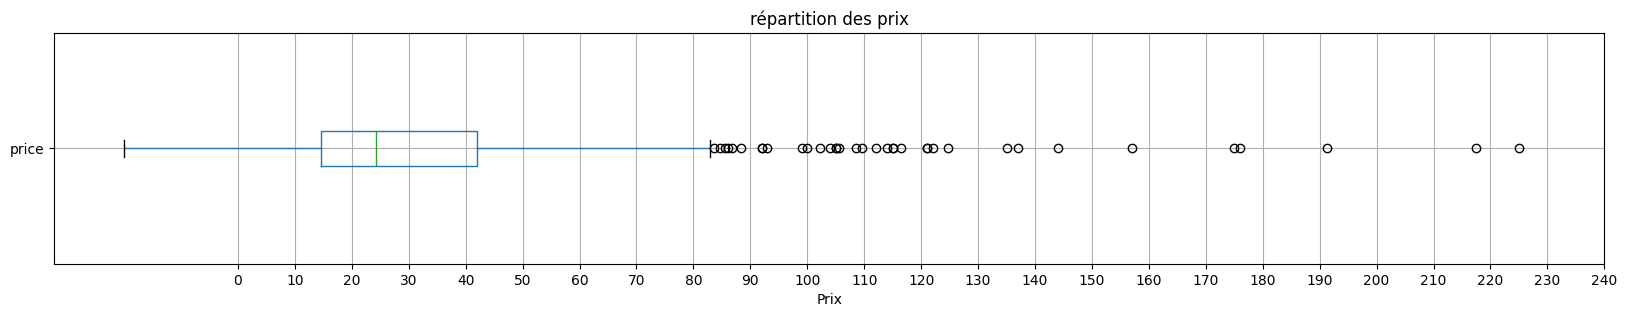

In [128]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

plt.figure(figsize=(20,3))  #  largeur=12, hauteur=8
selection_colonnes=['price']
df_boxplot=df_merged[selection_colonnes]

# Créer une boîte à moustache
df_boxplot.boxplot(vert=False)
plt.xticks(ticks=range(0, 250, 10))
plt.title('répartition des prix')
plt.xlabel('Prix')
#plt.ylabel('')
plt.show()


In [129]:
#Autre méthode avec plotly express

fig = px.box(df_merged, x='price', title='repartition des prix',points="all")
fig.update_xaxes(tick0=0, dtick=10, title='')#tick0= position de départ dtick=écart entre les ticks.

fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [130]:
#Calculer la moyenne du prix (moyenne est : somme valeurs divisé par nombre valeurs)
print('\nle prix moyen est : ',round(df_merged['price'].mean(),2))
#Calculer l'écart-type du prix (ecart type est la racine carré de la variance, la variance est la somme des valeurs individuellement soustrait à la moyenne
# mis individuelement au carré puis le tout divisé par le nombre de valeurs.)
print("l'écart-type' est : ",round(df_merged['price'].std(),2))

#somme des valeurs ici :df_merged['price'].count()

#Calculer le Z-score Le Z-score, également connu sous le nom de score standard, est une mesure statistique qui décrit la position d’une valeur donnée par rapport à la 
# moyenne d’un groupe de valeurs. Plus précisément, un Z-score indique combien d’écarts-types une valeur donnée est au-dessus ou en dessous de la moyenne.


#Z=σ(X−μ)​
#X  la valeur spécifique pour laquelle nous calculons le score Z.
#μ  la moyenne
#σ  l'écart-type

liste_prix=df_merged['price'].tolist()

import statistics
moyenne = df_merged['price'].mean()
ecart_type = df_merged['price'].std()
z_scoreglobal = moyenne/ecart_type
zscore = statistics.NormalDist(moyenne,ecart_type).zscore(24.2) #valeur prix - moyenne / ecart type 
print("z-score pour le prix de 24,2 (par exemple): ",zscore)
print("\nZscore :", stats.zscore(liste_prix[:30]),"et caetera...")
print("\nle z-score global est de ",z_scoreglobal)



le prix moyen est :  32.19
l'écart-type' est :  26.71
z-score pour le prix de 24,2 (par exemple):  -0.2990294254103675

Zscore : [-0.50691464 -0.07931125 -0.65086033 -0.93451802  0.41603128 -0.07931125
 -0.14705041 -0.21055586  1.00874884  0.27208559  1.85548822 -0.75670276
 -0.5661864  -0.71436579 -0.60852337 -1.20547463 -0.10471344  0.34405843
  1.49985768  2.11374373  1.55912944  0.45836825 -0.93451802  1.58029792
 -2.37820866 -0.62122446 -1.07423002 -0.24019174  0.54304219  0.16200947] et caetera...

le z-score global est de  1.204986689736261


In [131]:
#Quel est le seuil prix dont z-score est supérieur à 3?


zscore_listeprix =stats.zscore(liste_prix) #liste z-score de la liste des prix.

indicelist=[]
listscore=[]                               #creation d'une liste vide
for i,z in enumerate(zscore_listeprix):    #utilisation de la boucle for i=indice, z=valeur z-score. on énumère la liste.
    if z > 3:                              #si z(z-score) est supérieur à 3 alors.
        listscore.append(z)
        indicelist.append(i) #on insère dans la liste la valeur i(indice). donc list score rassemble tous les indices supérieur à 3.

zscore_min = np.min(listscore)
print("Le seuil z-score > 3 est de {}.".format(zscore_min))

indice_min=np.where(zscore_listeprix==zscore_min)[0][0]#premier 0 accede au premier element du tuple et le second est premier element du tableau
print("l'indice minimum est : ",indice_min)

prixseuil = liste_prix[indice_min]
print('Le prix seuil est de : ',prixseuil)

Le seuil z-score > 3 est de 3.0646037765418437.
l'indice minimum est :  709
Le prix seuil est de :  114.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [132]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions


#L’ intervalle interquartile , souvent appelé « IQR », est un moyen de mesurer la répartition des 50 % intermédiaires d’un ensemble de données. Il est calculé 
# comme la différence entre le premier quartile* (le 25e centile) et le troisième quartile (le 75e centile) d’un ensemble de données.

#calculate interquartile range of values in the 'points' column
#q75, q25 = np.percentile(df['points'], [75 ,25])
#iqr = q75 - q25

q75,q25 = np.percentile(df_merged['price'],[75,25])
iqr= q75 - q25
print("L'intervalle interquartille est de : ",iqr)

df_merged['price'].describe() # std = ecart type

L'intervalle interquartille est de :  27.5


count    825.000000
mean      32.187697
std       26.712077
min      -20.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [133]:

fig = px.box(df_merged, x='price', title='repartition des prix',points="outliers")
fig.update_xaxes(tick0=0, dtick=10, title='')#tick0= position de départ dtick=écart entre les ticks.

fig.show()



In [134]:
#Définissez un seuil pour les articles "outliers" en prix

outlierlimit = q75 + 1.5 * iqr #convention standard pour détecter les valeurs abbérantes (ici les valeurs supérieur)

print("La limite supérieur des outliers est :",outlierlimit)
outliers = [i for i in liste_prix if i > outlierlimit]
seuil_outlier=min(outliers)
print('la valeur seuil pour les outliers est de : ',seuil_outlier)

La limite supérieur des outliers est : 83.25
la valeur seuil pour les outliers est de :  83.7


In [135]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
print('le nombre de prix considérés comme outliers :',len(outliers),". Pour un nombre total de {} articles.".format(len(liste_prix)))
proportion_outliers=round((len(outliers)/len(liste_prix))*100,2)
print("proportion d'ouliers : ",proportion_outliers,"%")

le nombre de prix considérés comme outliers : 36 . Pour un nombre total de 825 articles.
proportion d'ouliers :  4.36 %


In [136]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
print("ces outliers sont tout à fait justifiés. Ils représentent simplement les produits plus chers.",
      "le prix maximum est : ",max(outliers),"€\nle prix minimum : ",min(outliers),"€ . et ne représentent que ",proportion_outliers,"% des produits.",
      "Rien de vraiment abbérant considérant le type de produits vendus.\nOn aurait pu s'attendre à des prix beaucoup plus élevés.",
      "\nIl y a eu dans le dataset des éléments négatifs qui on été supprimé ou rectifiés précédement.")

ces outliers sont tout à fait justifiés. Ils représentent simplement les produits plus chers. le prix maximum est :  225.0 €
le prix minimum :  83.7 € . et ne représentent que  4.36 % des produits. Rien de vraiment abbérant considérant le type de produits vendus.
On aurait pu s'attendre à des prix beaucoup plus élevés. 
Il y a eu dans le dataset des éléments négatifs qui on été supprimé ou rectifiés précédement.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [137]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merged['CA']= df_merged["price"]*df_merged['total_sales']
print(df_merged[['price','total_sales','CA']].head())
#Calculez la somme de la colonne "ca_par_article"
print('\n\nSomme de la colonne CA : ',round(df_merged['CA'].sum(),1),"€.")
#Ce résultat correspond au chiffre d'affaire du site web


   price  total_sales     CA
0   24.2          6.0  145.2
1   34.3          9.0  308.7
2   20.8          0.0    0.0
3   14.1         12.0  169.2
4   46.0          3.0  138.0


Somme de la colonne CA :  143505.1 €.


In [138]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
df_merged=df_merged.sort_values(by='CA', ascending=False).reset_index()
df_merged['CA']=df_merged['CA'].round(decimals = 2)
#Afficher les 20 premier articles en CA
top20_ca=df_merged['CA'].tolist()
top20_ca=top20_ca[:20]
print("Liste des 20 premiers chiffres d'affaire :\n",top20_ca)

#Graphique en barre des 20 premiers articles avec plotly express
top20=df_merged.head(20).reset_index(drop=True)
df_merged.drop('index',axis=1,inplace=True)
fig=px.bar(top20,y='CA',title="top 20 des chiffres daffaire par produits")
colors = px.colors.diverging.RdYlGn
fig.update_traces(marker=dict(color=top20['CA'], colorscale=colors),text=top20['CA'], textposition='inside')
fig.show()


Liste des 20 premiers chiffres d'affaire :
 [2475.0, 1147.8, 1113.0, 824.0, 805.0, 781.2, 735.0, 700.0, 675.0, 672.0, 633.6, 628.0, 627.0, 616.0, 599.2, 594.0, 582.0, 556.5, 537.6, 528.0]


In [139]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
somme_CA=df_merged['CA'].sum()
df_merged['part_du_CA']= df_merged["CA"]/somme_CA

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merged['somme_cumul_CA']=df_merged['part_du_CA'].cumsum()

print(df_merged[['price','total_sales','CA','part_du_CA','somme_cumul_CA']].head())

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
seuil=0.80
nb_articles=(df_merged['somme_cumul_CA']<=seuil).sum()+1#+1 pour compter l'article après le seuil.
print("\n\n{} articles représentent 80% du chiffre d'affaire pour un total de {} articles.".format(nb_articles,len(df_merged)))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles=round((nb_articles/len(df_merged))*100,2)
print('Ce qui représent {}% des articles'.format(proportion_articles))

   price  total_sales      CA  part_du_CA  somme_cumul_CA
0  225.0         11.0  2475.0    0.017247        0.017247
1  191.3          6.0  1147.8    0.007998        0.025245
2   79.5         14.0  1113.0    0.007756        0.033001
3   41.2         20.0   824.0    0.005742        0.038743
4  115.0          7.0   805.0    0.005610        0.044352


434 articles représentent 80% du chiffre d'affaire pour un total de 825 articles.
Ce qui représent 52.61% des articles


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [140]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
df_merged=df_merged.sort_values(by='total_sales', ascending=False).reset_index()

#Afficher les 20 premier articles en quantité
top20_sales=df_merged['total_sales'].tolist()
top20_sales=top20_sales[:20]
print("Liste des 20 plus grosses ventes :\n",top20_sales)

#Graphique en barre des 20 premiers articles avec plotly express
top20=df_merged.head(20).reset_index(drop=True)
df_merged.drop('index',axis=1,inplace=True)
fig=px.bar(top20,y='total_sales',title="top 20 des ventes par produits")
colors = px.colors.diverging.RdYlGn
fig.update_traces(marker=dict(color=top20['total_sales'], colorscale=colors),text=top20['total_sales'], textposition='inside')
fig.show()

Liste des 20 plus grosses ventes :
 [36.0, 27.0, 24.0, 22.0, 22.0, 20.0, 20.0, 18.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0]


In [141]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
somme_ventes=df_merged['total_sales'].sum()
df_merged['part_ventes']=df_merged['total_sales']/somme_ventes

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merged['somme_cumul_ventes']=df_merged['part_ventes'].cumsum()

print(df_merged[['total_sales','part_ventes','somme_cumul_ventes']].head())


#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
seuil=0.80
nb_articles=(df_merged['somme_cumul_ventes']<=seuil).sum()+1#+1 pour compter l'article après le seuil.
print("\n\n{} articles représentent 80% du nombre de ventes pour un total de {} articles.".format(nb_articles,len(df_merged)))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles=round((nb_articles/len(df_merged))*100,2)
print('Ce qui représent {}% des ventes'.format(proportion_articles))

   total_sales  part_ventes  somme_cumul_ventes
0         36.0     0.006267            0.006267
1         27.0     0.004701            0.010968
2         24.0     0.004178            0.015146
3         22.0     0.003830            0.018976
4         22.0     0.003830            0.022806


433 articles représentent 80% du nombre de ventes pour un total de 825 articles.
Ce qui représent 52.48% des ventes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [142]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock
df_merged['stock_mois']=round(df_merged['stock_quantity'] / df_merged['total_sales'],2)

#Remplacement des "inf" par 0
df_merged['stock_mois'].replace([np.inf, -np.inf], 0, inplace=True)
#df_merged['stock_mois'].fillna(0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merged=df_merged.sort_values(by='stock_mois', ascending=False).reset_index()
df_merged.drop(['index'],axis=1,inplace=True)

print(df_merged[['total_sales','stock_quantity','stock_mois']].head())

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
top20=df_merged.head(20).reset_index(drop=True)
fig=px.bar(top20,y='stock_mois',title="top 20 des produits avec le plus de stock par mois :")
colors = px.colors.diverging.Spectral_r
fig.update_traces(marker=dict(color=top20['stock_mois'], colorscale=colors),text=top20['stock_mois'], textposition='inside')
fig.show()

   total_sales  stock_quantity  stock_mois
0          4.0             125       31.25
1          5.0             138       27.60
2          3.0              81       27.00
3          5.0             125       25.00
4          3.0              71       23.67


In [143]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merged['valorisation_stock_€']=df_merged["price"]*df_merged["stock_quantity"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
sum_valo=df_merged['valorisation_stock_€'].sum()
print('Il y a {} € de produits en stock.'.format(sum_valo))
print('le coût moyen unitaire est de {} €.'.format(round(sum_valo/len(df_merged),2)))

Il y a 531773.3 € de produits en stock.
le coût moyen unitaire est de 644.57 €.


In [144]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
sum_stock=df_merged['stock_quantity'].sum()
print('Il y a {} produits en stock.'.format(sum_stock))

Il y a 17822 produits en stock.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [145]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merged['prix_HT']=df_merged['price']/1.2 

#Création de la colonne Taux de marge
df_merged['taux_marge']=round((df_merged['prix_HT']-df_merged['purchase_price'])/df_merged['prix_HT'],2)
print(df_merged[['price','purchase_price','prix_HT','taux_marge']].head())

#Afficher le prix minimum de la colonne "taux_marge"
print('\ntaux de marge minimun : ',df_merged['taux_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
print('taux de marge maximum : ',df_merged['taux_marge'].max())

#max : 1.65

   price  purchase_price     prix_HT  taux_marge
0   53.0           32.15   44.166667        0.27
1  135.0           80.33  112.500000        0.29
2   51.6           31.00   43.000000        0.28
3   59.0           34.76   49.166667        0.29
4   37.5           21.88   31.250000        0.30

taux de marge minimun :  -6.35
taux de marge maximum :  1.65


In [146]:
#affichage de la ligne avec un taux de marge inférieur à 0
marge_negative=df_merged[df_merged['taux_marge']<0]
print('lignes avec un taux de marge inférieur à 0 :')
print(marge_negative[['price','purchase_price','prix_HT','taux_marge']])

lignes avec un taux de marge inférieur à 0 :
     price  purchase_price    prix_HT  taux_marge
674  12.65           77.48  10.541667       -6.35
749  92.00           99.00  76.666667       -0.29
799  31.00           31.20  25.833333       -0.21
808   8.30            9.99   6.916667       -0.44


In [147]:
#création d'un dataframe avec les taux positifs
marge_positive=pd.DataFrame(df_merged[df_merged['taux_marge']>0])
print(marge_positive[['price','purchase_price','prix_HT','taux_marge']].head())

#Afficher le prix minimum de la colonne "taux_marge"
print('\ntaux de marge minimun : ',marge_positive['taux_marge'].min())

#Afficher le prix maximum de la colonne "taux_marge"
print('taux de marge maximum : ',marge_positive['taux_marge'].max())

   price  purchase_price     prix_HT  taux_marge
0   53.0           32.15   44.166667        0.27
1  135.0           80.33  112.500000        0.29
2   51.6           31.00   43.000000        0.28
3   59.0           34.76   49.166667        0.29
4   37.5           21.88   31.250000        0.30

taux de marge minimun :  0.23
taux de marge maximum :  1.65


In [148]:
df_search=df_merged[['purchase_price','price','prix_HT','taux_marge']]
df_search

,purchase_price,price,prix_HT,taux_marge
0,32.15,53.0,44.166667,0.27
1,80.33,135.0,112.500000,0.29
2,31.00,51.6,43.000000,0.28
3,34.76,59.0,49.166667,0.29
4,21.88,37.5,31.250000,0.30
...,...,...,...,...
820,9.32,18.8,15.666667,0.41
821,13.68,27.3,22.750000,0.40
822,20.75,39.0,32.500000,0.36
823,6.47,12.9,10.750000,0.40


In [149]:
#création d'un dataframe avec le taux de marge moyen par type de produit
moy_taux_marge=pd.DataFrame(round(df_merged.groupby('product_type')['taux_marge'].mean(),2))
moy_taux_marge=moy_taux_marge.sort_values(by='taux_marge', ascending=False).reset_index()
print(moy_taux_marge)

#Affichage dans un graphique du taux de marge par type de produit
fig=px.bar(moy_taux_marge,y='product_type',x='taux_marge',title="taux de marge moyen par type de produit")
colors = px.colors.diverging.RdYlGn
fig.update_traces(marker=dict(color=moy_taux_marge['taux_marge'], colorscale=colors),text=moy_taux_marge['taux_marge'], textposition='inside',orientation='h')
fig.show()

    product_type  taux_marge
0         Cognac        0.45
1         Whisky        0.45
2            Gin        0.43
3            Vin        0.38
4  Huile d'olive        0.25
5      Champagne        0.05


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

<Axes: >

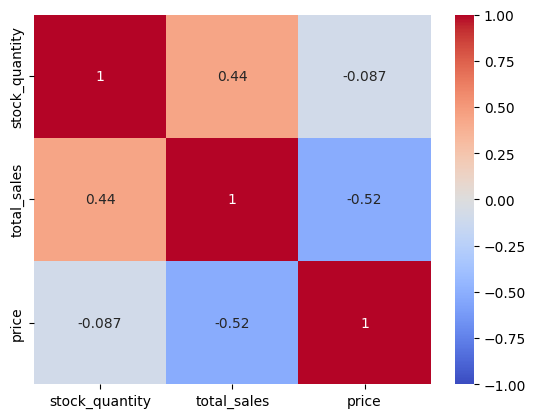

In [150]:
############################
# Analyse des correlations #
############################

#Création d'un heatmap seaborn de correlation avec les variables stock, sales et price
df_heatmap=df_merged[['stock_quantity','total_sales','price']]
sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

<Axes: >

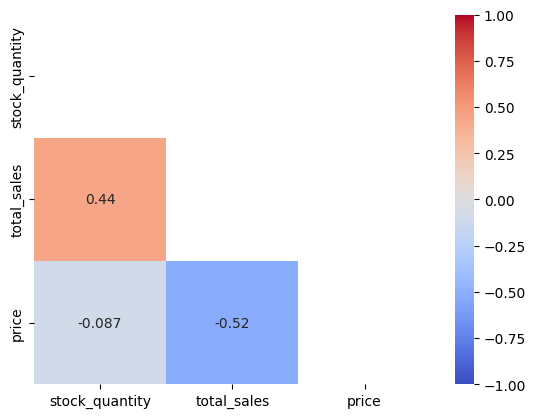

In [151]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
upp_mat = np.triu(df_heatmap.corr())
sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=+1, annot=True,mask=upp_mat, cmap="coolwarm")

In [152]:
#Que peut-on conclure des correlations ?
print('Stock_quantity et price on une correlation de -0.87.\nTotal_sales et price -0.52.\nTotal_sales et stock quantity de 0.44.',
      "\n\nSur une échelle de correlation de 1 à -1.\nIl semble évident que les ventes influe sur les stocks mais que les prix et les ventes se soient pas en corrélation.",
      "le résultat des prix corrélés avec les stocks est la différence \nentre les deux valeurs précédentes.")

Stock_quantity et price on une correlation de -0.87.
Total_sales et price -0.52.
Total_sales et stock quantity de 0.44. 

Sur une échelle de correlation de 1 à -1.
Il semble évident que les ventes influe sur les stocks mais que les prix et les ventes se soient pas en corrélation. le résultat des prix corrélés avec les stocks est la différence 
entre les deux valeurs précédentes.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [153]:
#Mettre le dataset df_merge sur un fichier Excel
df_merged.to_excel("df_merged.xlsx",
             sheet_name='bottleneck')  

#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
